_version log: improving artificial interferogram for slanted fringes_

In [254]:
from numpy import genfromtxt
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import pandas as pd

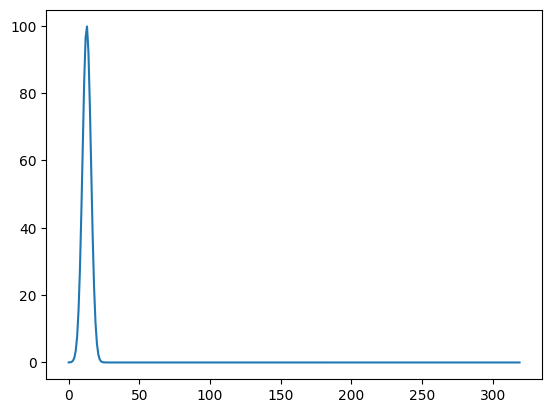

In [255]:
def gaussian_line(x, x0, dx): #orginally created by Elin
    return np.exp(-(x - x0) ** 2 / (2 * dx ** 2))


width = 640
height = 512
wavelength = 50 #in pixels
bandwidth = 3
angle = 5 #in degrees

# Start with a gaussian spectrum of frequencies
frequency = width / wavelength
freqs = np.arange(-width//2,width//2)
FT = gaussian_line(freqs, frequency, bandwidth) + gaussian_line(freqs, -frequency, bandwidth)
FT = 100*FT

#plt.plot(freqs,
#         FT)
plt.plot(freqs[len(freqs)//2:],
         FT[len(freqs)//2:])
plt.show()

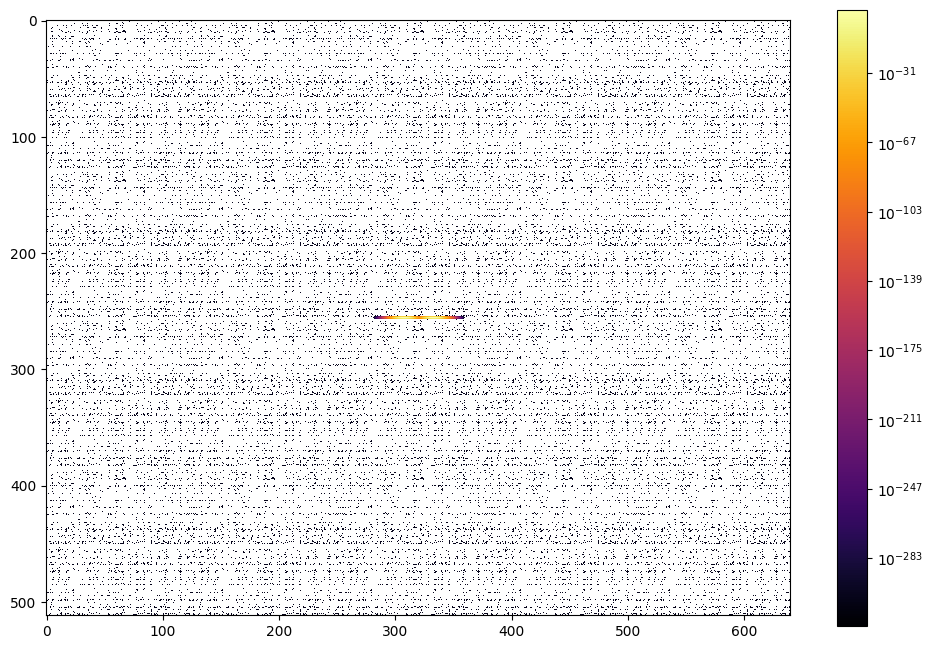

In [256]:
# make spectrum 2d
FT2 = np.zeros((height, len(FT)))
FT2[height//2,:] = FT

plt.figure(figsize = (12,8))
im=plt.imshow(np.abs(FT2), cmap='inferno', norm = "log")
plt.colorbar(im)
plt.show()

In [257]:
#rotate spectrum
FT2 = ndimage.rotate(FT2, angle, reshape = False)

In [258]:
# inverse fourier
interferogram = np.fft.ifft2(FT2, norm = "forward")
interferogram = np.fft.fftshift(interferogram)

In [259]:
#mimic the format of the real data
interferogram = np.real(interferogram)
interferogram = np.round((interferogram * 2**14) /interferogram.max())

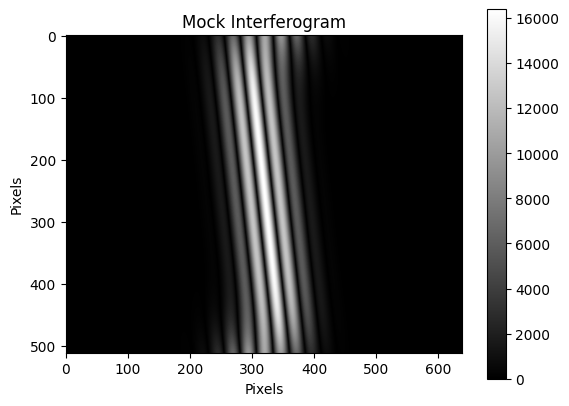

In [260]:
im = plt.imshow(np.abs(interferogram), cmap='gray')
plt.colorbar(im)
plt.title('Mock Interferogram')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

In [261]:
# fourier transform again to check deteriation of signal
FT2 = np.fft.fft2(interferogram, norm = "forward")

#filter out weak intensities
#FT2 = np.where(FT2 > np.mean(FT2) + 0.01*np.std(FT2), FT2, np.zeros(FT2.shape))
#print(np.mean(FT2) + 0.01*np.std(FT2))

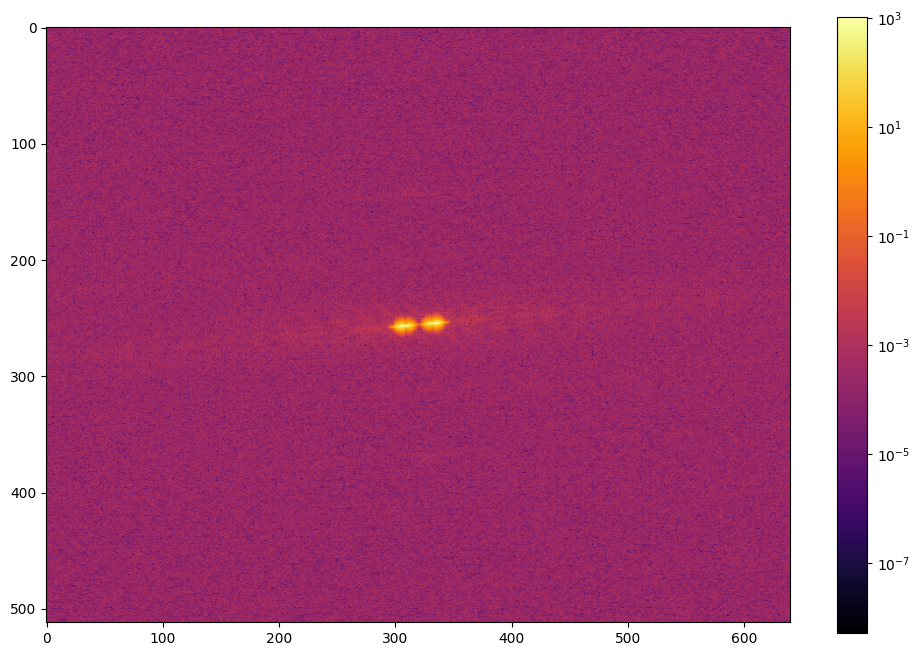

In [262]:
plt.figure(figsize = (12,8))
im=plt.imshow(np.abs(FT2), cmap='inferno', norm = "log")
plt.colorbar(im)
plt.show()